In [110]:
import seaborn as sb
import re
import pathlib
import pandas as pd
import collections

In [111]:
sb.set_style('whitegrid')

In [80]:
# obtain a path for the results folder containing the results
# 200 draws
# 1000 loops
# 100 warm up loops
# all in ASCENDING order
# using GraalVM
# Preserving path between destination and source
graalvm_results_ascending = pathlib.Path('../results/i5_8300H/2.1GHz/graalvm/preserve-path/200Draws/100WarmUpLoops/1000Loops/ASCENDING/')
graalvm_results_random = pathlib.Path('../results/i5_8300H/2.1GHz/graalvm/preserve-path/200Draws/100WarmUpLoops/1000Loops/RANDOM/')

In [81]:
summary_re = re.compile(r'Overall: node count: (?P<nodes>[^,]+)'
                        r', average edge count: (?P<edges>[^:]+): '
                        r'average search time: (?P<search_ns>\S+)')
loop_re = re.compile(r'Draw (?P<draw>\d+): loop (?P<loop>\d+): (?P<edges>\d+) edges: '
                     '(?P<time>\d+) ns: path found: (?P<path>[^.]+).')

In [127]:
LoopData = collections.namedtuple('LoopData', ('nodes', 'draw', 'loop', 'edges', 'time_ns', 'path')) 

matches_ascending = dict()
loops_ascending = list()
for fpath in graalvm_results_ascending.iterdir():
    if not fpath.name.endswith('txt'):
        continue
    txt = fpath.read_text()
    nodes = int(fpath.stem)
    matches_ascending[nodes] = summary_re.search(txt)
    loops_ascending.extend(list(LoopData(nodes, int(m['draw']), int(m['loop']), 
                                    int(m['edges']), int(m['time']), 
                                    m['path'])
                                    for m in loop_re.finditer(txt)))
    
matches_random = dict()
loops_random = list()
for fpath in graalvm_results_random.iterdir():
    if not fpath.name.endswith('txt'):
        continue
    txt = fpath.read_text()
    nodes = int(fpath.stem)
    matches_random[nodes] = summary_re.search(txt)
    loops_random.extend(list(LoopData(nodes, int(m['draw']), int(m['loop']), 
                                 int(m['edges']), int(m['time']), 
                                 m['path'])
                                 for m in loop_re.finditer(txt)))

In [128]:
runtimes_against_sum_edge_node_count_ascending = [(float(m['edges']) + float(m['nodes']), 
                                                  float(m['search_ns'])) for m in matches_ascending.values()]
runtimes_against_sum_edge_node_count_random = [(float(m['edges']) + float(m['nodes']), 
                                               float(m['search_ns'])) for m in matches_random.values()]

In [129]:
summary_data_ascending = pd.DataFrame(runtimes_against_sum_edge_node_count_ascending, 
                                      columns=('Average number of edges + number of nodes', 'Average CPU time (ns)'))
summary_data_random = pd.DataFrame(runtimes_against_sum_edge_node_count_random, 
                                   columns=('Average number of edges + number of nodes', 'Average CPU time (ns)'))

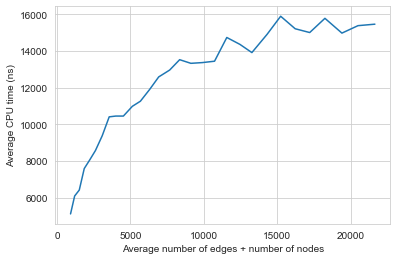

In [130]:
sb.lineplot(data=summary_data_ascending, 
            y='Average CPU time (ns)', x='Average number of edges + number of nodes')

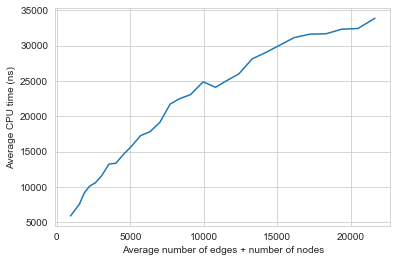

In [131]:
sb.lineplot(data=summary_data_random, 
            y='Average CPU time (ns)', x='Average number of edges + number of nodes')

In [132]:
loop_data_ascending = pd.DataFrame(loops_ascending)
loop_data_random = pd.DataFrame(loops_random)

Count plots for the ascending case

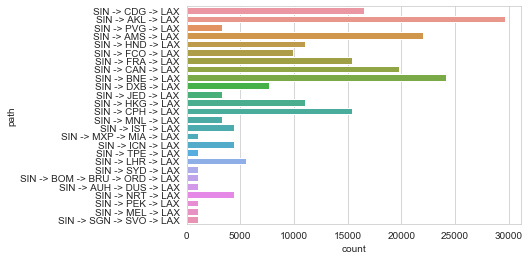

In [159]:
sb.countplot(data=loop_data_ascending[loop_data_ascending['nodes'] == 500], y='path')

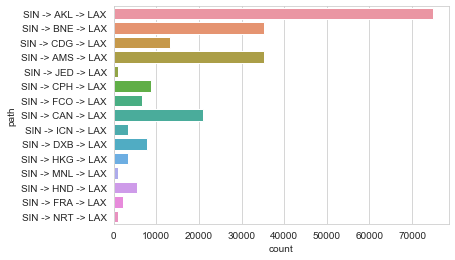

In [160]:
sb.countplot(data=loop_data_ascending[loop_data_ascending['nodes'] == 1000], y='path')

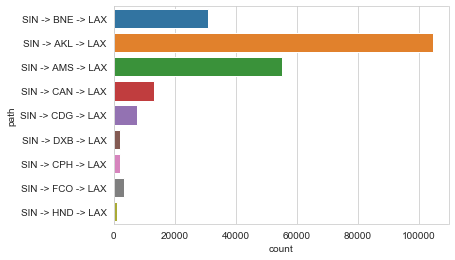

In [161]:
sb.countplot(data=loop_data_ascending[loop_data_ascending['nodes'] == 1500], y='path')

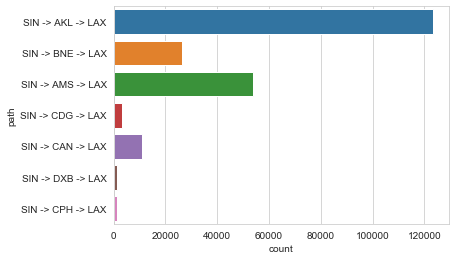

In [162]:
sb.countplot(data=loop_data_ascending[loop_data_ascending['nodes'] == 2000], y='path')

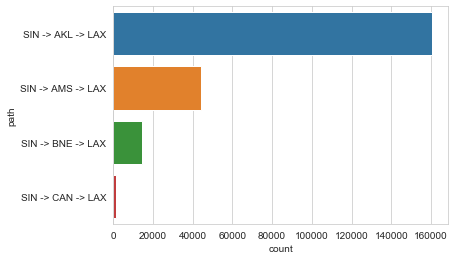

In [163]:
sb.countplot(data=loop_data_ascending[loop_data_ascending['nodes'] == 2500], y='path')

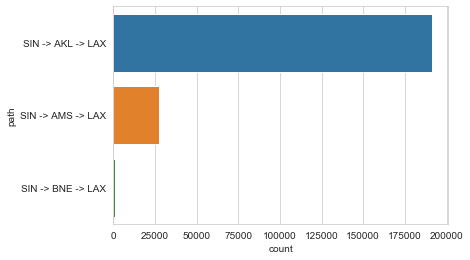

In [164]:
sb.countplot(data=loop_data_ascending[loop_data_ascending['nodes'] == 3000], y='path')

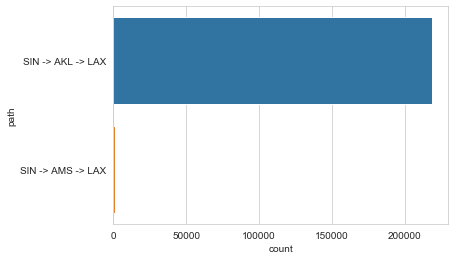

In [165]:
sb.countplot(data=loop_data_ascending[loop_data_ascending['nodes'] == 3400], y='path')

Count plots for the random case

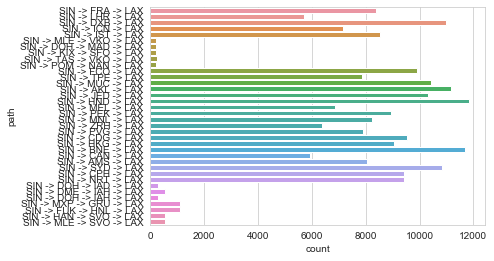

In [166]:
sb.countplot(data=loop_data_random[loop_data_random['nodes'] == 500], y='path')

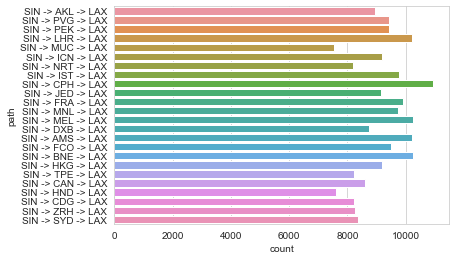

In [167]:
sb.countplot(data=loop_data_random[loop_data_random['nodes'] == 1000], y='path')

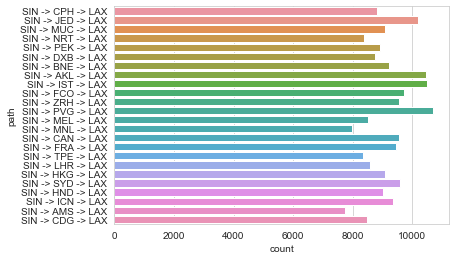

In [168]:
sb.countplot(data=loop_data_random[loop_data_random['nodes'] == 1500], y='path')

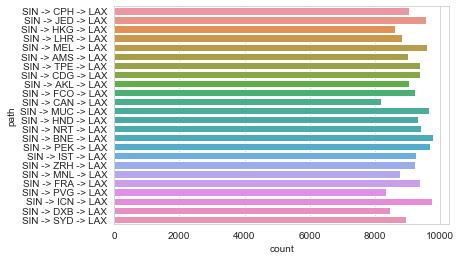

In [169]:
sb.countplot(data=loop_data_random[loop_data_random['nodes'] == 2000], y='path')

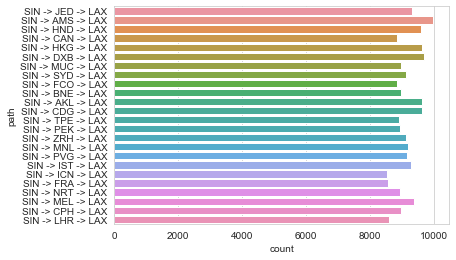

In [170]:
sb.countplot(data=loop_data_random[loop_data_random['nodes'] == 2500], y='path')

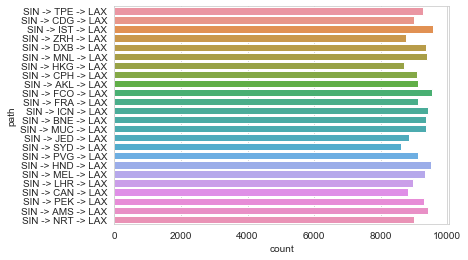

In [171]:
sb.countplot(data=loop_data_random[loop_data_random['nodes'] == 3000], y='path')

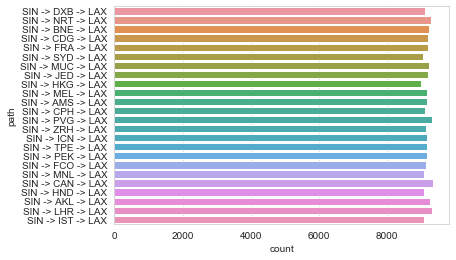

In [172]:
sb.countplot(data=loop_data_random[loop_data_random['nodes'] == 3400], y='path')

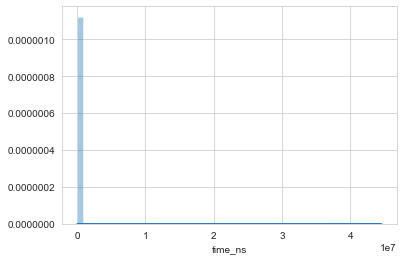

In [122]:
sb.distplot(loop_data_ascending['time_ns'])

In [123]:
sb.distplot(loop_data_descending['time_ns'])

NameError: name 'loop_data_descending' is not defined